In [119]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression

In [5]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('E:\churn_prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4896\1031926518.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('E:\churn_prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Let's begin our analysis:- 
This is going to be a detailed description on HOW
- You encode all categorical columns --> Best for your model
- You Select best features --> feature selection
- You extract best feature --> feature extraction
- You tune them best by using optuna

### First drop non-usefull columns for which we don't need to apply any feature selection techinique


In [49]:
df.drop(columns='customerID',inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Target feature have missing values & *Mostly columns are categorical*
#### Now, we are going to do feature engineering --> feature SELECTION

#### ***Because mostly columns are categorical let's apply chi-square test***

In [21]:
# First select categorical columns as this TEST can only apply on categorical columns
cat_df = df.select_dtypes(include=['category','object'])

In [22]:
cat_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [29]:
# Drop TotalCharges column as it's dtype is float but it is saved as object
cat_df.drop(columns='TotalCharges',inplace=True)

In [30]:
ct = pd.crosstab(cat_df['Churn'],cat_df['Contract'],margins=True)
ct

Contract,Month-to-month,One year,Two year,All
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
All,3875,1473,1695,7043


In [31]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

score = []

for feature in cat_df.columns[:-1]:

    # create contingency table
    ct = pd.crosstab(cat_df['Churn'], cat_df[feature])

    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

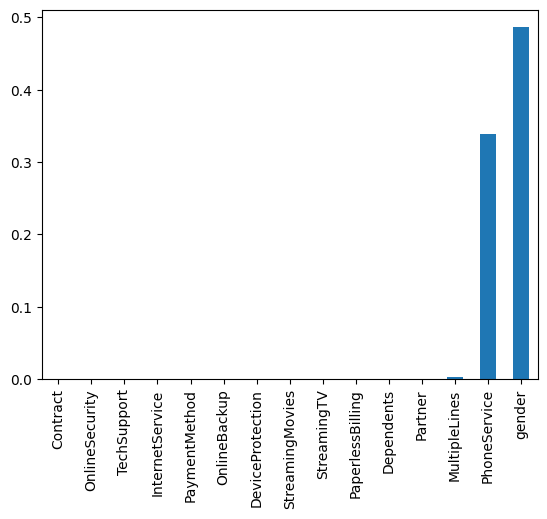

In [32]:
pd.Series(score, index=cat_df.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

 **As pre graph drop last two columns -->'-'<-- they are not usefull much**

In [50]:
df.drop(columns=['PhoneService','gender'],inplace=True)

 Now one more crucial step as we have many categorical columns check is there any duplicated or not


In [36]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns


In [40]:
# this generalised function will help you to get duplicate columns if there is any
duplicate_columns = get_duplicate_columns(df)

In [41]:
duplicate_columns


{}

## No duplicate columns we are good to go ^-^

*Let's encode categorical columns*

In [52]:
# first encode our target column Yes-->1 & No-->0
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

## I have a plan for this
 - First we encode the feature then we check it's corelation with target column 
 - if the corelation is b/w 0<-->1 means column has a relation with target column ***LINEARLY***
 - if the corelation is b/w -1<-->0 means column does not have a relation with target column ***LINEARLY***

In [51]:
# This process can be hectic because we our  going to do this manually and not using label encoder as we want to get the best result 
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [45]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [ ]:
df['Partner'] = df['Partner'].map({'Yes':0,'No':1})
# Yes-->1 & No-->0 give not good result
df[['Partner','Churn']].corr()

,Partner,Churn
Partner,1.000000,0.150448
Churn,0.150448,1.000000


In [54]:
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes':1,'No':2,'No internet service':0})


In [55]:
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes':1,'No':2,'No internet service':0})


In [56]:
df['DeviceProtection'] =df['DeviceProtection'].map({'Yes':1,'No':2,'No internet service':0})


In [57]:
df['TechSupport'] = df['TechSupport'].map({'Yes':1,'No':2,'No internet service':0})


In [58]:
df['StreamingTV'] = df['StreamingTV'].map({'Yes':1,'No':2,'No internet service':0})


In [59]:
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes':1,'No':2,'No internet service':0})


In [60]:
df['Contract'] = df['Contract'].map({'Month-to-month':2,'Two year':0,'One year':1})


In [61]:

df['Dependents'] = df['Dependents'].map({'Yes':0,'No':1})


In [63]:
df['PaperlessBilling']= df['PaperlessBilling'].map({'Yes':1,'No':0})


In [64]:
df['PaymentMethod']= df['PaymentMethod'].map({'Electronic check':3,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':0})


In [66]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes':2,'No':0,'No phone service':1})

In [69]:
df['InternetService'] = df['InternetService'].map({'DSL':1,'Fiber optic':2,'No':0})

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   object 


In [74]:
# Now change TotalCharges from object --> float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [77]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [79]:
# lets use mean to fill these values
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [80]:
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
df.corr()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,-0.016479,0.211185,0.016567,0.146185,0.259390,0.210897,0.152780,0.157095,0.223770,0.130130,0.120802,0.142554,0.156530,0.143821,0.220173,0.102395,0.150889
Partner,-0.016479,1.000000,0.452676,-0.379697,-0.142410,0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.294806,0.014877,0.058384,-0.096848,-0.318812,0.150448
Dependents,0.211185,0.452676,1.000000,-0.159712,0.024991,0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.126546,0.113890,-0.064535,0.164221
tenure,0.016567,-0.379697,-0.159712,1.000000,0.343032,0.033230,-0.145298,-0.178651,-0.178649,-0.144459,-0.136145,-0.140781,-0.671607,0.006152,-0.166875,0.247900,0.824757,-0.352229
MultipleLines,0.146185,-0.142410,0.024991,0.343032,1.000000,0.329715,0.207839,0.150371,0.147500,0.205748,0.119534,0.116330,-0.110842,0.165146,0.074918,0.433576,0.452883,0.038037
InternetService,0.259390,0.000132,0.179631,0.033230,0.329715,1.000000,0.764943,0.686403,0.682448,0.760985,0.617704,0.620005,0.290189,0.378108,0.306616,0.905491,0.427749,0.316846
OnlineSecurity,0.210897,0.081850,0.190523,-0.145298,0.207839,0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.299496,0.621227,0.153051,0.332819
OnlineBackup,0.152780,0.087055,0.162445,-0.178651,0.150371,0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.351267,0.262402,0.249755,0.538454,0.084920,0.291449
DeviceProtection,0.157095,0.094451,0.156439,-0.178649,0.147500,0.682448,0.749040,0.740604,1.000000,0.767970,0.763279,0.766821,0.390216,0.276326,0.256501,0.513440,0.077305,0.281465
TechSupport,0.223770,0.069072,0.180832,-0.144459,0.205748,0.760985,0.791225,0.754095,0.767970,1.000000,0.737578,0.737123,0.418440,0.310749,0.300312,0.597594,0.140843,0.329852


# Now all values are corelated with the target values but before training models 
## as per the corelation matrix we can also see clearly input column are not only related to target column but also with each other

#### *MEANS MULTICOLINEARITY* to check this we need to calcuate VIF Variance inflation factor

#### - value<5 no multicolinearity
#### - value>5 less multicolinearity
#### - value>10 high multicolinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select only numerical independent features
X = df  # replace with your features

# Add constant for intercept
X_const = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
print(vif_data)


             Feature        VIF
0      SeniorCitizen   1.153066
1            Partner   1.461564
2         Dependents   1.383956
3             tenure   6.963388
4      MultipleLines   1.359253
5    InternetService  13.780519
6     OnlineSecurity   3.906788
7       OnlineBackup   3.272421
8   DeviceProtection   3.712643
9        TechSupport   4.309053
10       StreamingTV   3.838695
11   StreamingMovies   3.846579
12          Contract   2.470516
13  PaperlessBilling   1.207295
14     PaymentMethod   1.206804
15    MonthlyCharges  14.111907
16      TotalCharges  10.098295
17             Churn   1.386534


#### Let's drop MonthlyCharges and Internet service --> it is also possible that dropping this much columns can decrease your score as this is always hit and trial method

In [84]:
df1 = df.drop(columns=['MonthlyCharges','InternetService'])

#### main df is safe we are going to use df1 so we can use df if results are not in favor


In [85]:
# Let's split our data
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(df1.drop(columns='Churn'),df1['Churn'],test_size=0.2,random_state=42)


In [125]:
y_train.value_counts().values

array([4138, 1496])

Text(0.5, 1.0, 'Distribution of Classes in y_train')

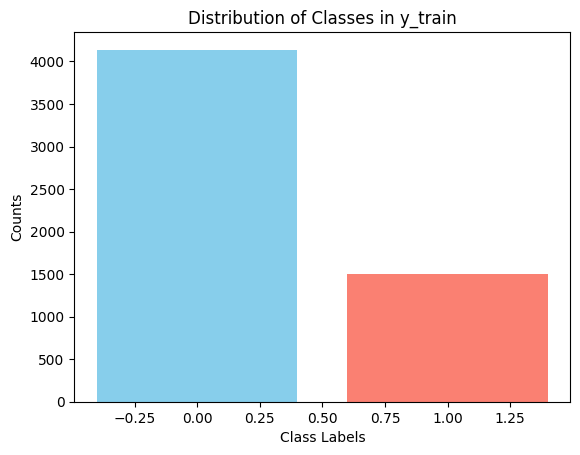

In [129]:
values = y_train.value_counts().values
labels = y_train.value_counts().index

plt.bar(labels, values, color=['skyblue', 'salmon'])  # Change/add colors as needed
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.title('Distribution of Classes in y_train')

## imbalanced Dataset


### training models will LogisticRegression and RandomForest as they gives best results on this 
#### ***Because i already trained GradintBoosting,XGB,SVC on this also. ^-^***

### We our going to use optuna for hyperparameter i already did this so i am not going to do this again
### i am leaving the code for you so you can check how it proceds

In [88]:
# def objective(trial):
#     solver = trial.suggest_categorical("solver", ["lbfgs", "saga", "liblinear"])
#     penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet",None])
#     C = trial.suggest_float("C", 1e-7, 10.0, log=True)
#     # Validate solver-penalty compatibility
#     if (solver == "lbfgs" and penalty not in ["l2",None]) or \
#        (solver == "liblinear" and penalty not in ["l1", "l2"]) or \
#        (solver == "saga" and penalty not in ["l1", "l2", "elasticnet",None]):
#         raise optuna.exceptions.TrialPruned()

#     l1_ratio = None
#     if penalty == "elasticnet":
#         l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)

#     clf = LogisticRegression(
#         solver=solver,
#         penalty=penalty,
#         l1_ratio=l1_ratio,
#         C=C,
#         max_iter=trial.suggest_int("max_iter", 1500,3500)
#     )
#     # train and evaluate model here ...

#     # Fit and evaluate model as usual

#     # Perform cross-validation and return the mean accuracy
#     score = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy').mean()
#     return score

In [86]:
# Let's create study
#study = optuna.create_study(direction='maximize')
#study.optimize(objective,n_trials=50)

#### you can also try by adding one more parameter class_weight to LogisticRegression study

In [87]:

#best_trial = study.best_trial
#print("Best trial parameters:", best_trial.params)
#print("Best trial accuracy:", best_trial.value)

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='liblinear',C=0.20541894220762066,penalty='l1',max_iter=3454)
lr.fit(X_train,y_train)
y1_pred = lr.predict(X_test)
print(classification_report(y_test,y1_pred))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import optuna

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # ✅ Updated max_features options — 'auto' removed
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight='balanced',
        random_state=42
    )

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score




In [99]:
import optuna
study1 = optuna.create_study(direction='maximize')
study1.optimize(objective_rf,n_trials=50)

[I 2025-07-19 13:31:20,788] A new study created in memory with name: no-name-6af28a02-d9d8-4d65-a9bf-c50959dcafa7
[I 2025-07-19 13:31:23,724] Trial 0 finished with value: 0.7273695420660277 and parameters: {'n_estimators': 195, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.7273695420660277.
[I 2025-07-19 13:31:32,529] Trial 1 finished with value: 0.7603833865814696 and parameters: {'n_estimators': 260, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 1 with value: 0.7603833865814696.
[I 2025-07-19 13:31:40,997] Trial 2 finished with value: 0.7586084487042953 and parameters: {'n_estimators': 258, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 1 with value: 0.7603833865814696.
[I 2025-07-19 13:31:44,751] Trial 3 finished with value: 0.7710330138445154 and parameters: {'n_estimators': 233, 'max_depth': 18, 'min_s

In [100]:
study1.best_trial.value

0.7809726659566915

In [101]:
study1.best_trial.params

{'n_estimators': 229,
 'max_depth': 18,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': None}

In [102]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
lr = RandomForestClassifier(n_estimators=229,max_depth=18,min_samples_split=3,max_features=None,min_samples_leaf=2)
lr.fit(X_train,y_train)
y1_pred = lr.predict(X_test)
print(classification_report(y_test,y1_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#### Let's apply pca hope it give better resluts

In [103]:
X_train.shape

(5634, 15)

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
for i in range(1,16):
    pca = PCA(n_components=i)
    X_train_trans = pca.fit_transform(X_train)
    X_test_trans = pca.transform(X_test)
    rf = RandomForestClassifier(n_estimators=229,max_depth=18,min_samples_split=3,max_features=None,min_samples_leaf=2,class_weight='balanced')
    rf.fit(X_train_trans,y_train)
    y1_pred = rf.predict(X_test_trans)
    print(accuracy_score(y_test,y1_pred),'i=',i)
    

0.6458481192334989 i= 1
0.7672107877927609 i= 2
0.7856635911994322 i= 3
0.7977288857345636 i= 4
0.7863733144073811 i= 5
0.7920511000709723 i= 6
0.7934705464868701 i= 7
0.7984386089425124 i= 8
0.801277501774308 i= 9
0.7991483321504613 i= 10
0.8019872249822569 i= 11
0.7970191625266146 i= 12
0.7927608232789212 i= 13
0.7934705464868701 i= 14
0.7991483321504613 i= 15


In [108]:
pca1 = PCA(n_components=11)
X_train_trans = pca1.fit_transform(X_train)
X_test_trans = pca1.transform(X_test)
rf = RandomForestClassifier(n_estimators=229,max_depth=18,min_samples_split=3,max_features=None,min_samples_leaf=2,class_weight='balanced')
rf.fit(X_train_trans,y_train)
y1_pred = rf.predict(X_test_trans)
print(classification_report(y_test,y1_pred))



              precision    recall  f1-score   support

           0       0.85      0.89      0.86      1036
           1       0.63      0.55      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



#### Now at last votting classifier

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(n_estimators=229,max_depth=18,min_samples_split=3,max_features=None,min_samples_leaf=2,class_weight='balanced')
clf2 = LogisticRegression(solver='liblinear',C=0.20541894220762066,penalty='l1',max_iter=3454)
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Final Accuracy Score 
0.8126330731014905
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [112]:
# including PCA
for i in range(1,16):
        pca = PCA(n_components=i)
        X_train_trans = pca.fit_transform(X_train)
        X_test_trans = pca.transform(X_test)
        from sklearn.ensemble import AdaBoostClassifier
        from sklearn.ensemble import VotingClassifier
        clf1 = RandomForestClassifier(n_estimators=229,max_depth=18,min_samples_split=3,max_features=None,min_samples_leaf=2,class_weight='balanced')
        clf2 = LogisticRegression(solver='liblinear',C=0.20541894220762066,penalty='l1',max_iter=3454,class_weight='balanced')
        clf3 = AdaBoostClassifier()
        eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
        eclf1.fit(X_train_trans, y_train)
        predictions = eclf1.predict(X_test_trans)
        print("Final Accuracy Score ")
        print(accuracy_score(y_test, predictions),'i=',i)

Final Accuracy Score 
0.7104329311568488 i= 1
Final Accuracy Score 
0.7735982966643009 i= 2
Final Accuracy Score 
0.7970191625266146 i= 3
Final Accuracy Score 
0.7984386089425124 i= 4
Final Accuracy Score 
0.8019872249822569 i= 5
Final Accuracy Score 
0.8034066713981547 i= 6
Final Accuracy Score 
0.8062455642299503 i= 7
Final Accuracy Score 
0.8005677785663591 i= 8
Final Accuracy Score 
0.8026969481902059 i= 9
Final Accuracy Score 
0.801277501774308 i= 10
Final Accuracy Score 
0.7984386089425124 i= 11
Final Accuracy Score 
0.801277501774308 i= 12
Final Accuracy Score 
0.8055358410220014 i= 13
Final Accuracy Score 
0.8034066713981547 i= 14
Final Accuracy Score 
0.8005677785663591 i= 15


In [146]:
pca = PCA(n_components=14)
X_train_trans = pca.fit_transform(X_train)
X_test_trans = pca.transform(X_test)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(n_estimators=229,max_depth=18,min_samples_split=3,max_features=None,min_samples_leaf=2,class_weight='balanced')
clf2 = LogisticRegression(solver='liblinear',C=0.20541894220762066,penalty='l1',max_iter=3454,class_weight='balanced')
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='hard')
eclf1.fit(X_train_trans, y_train)
predictions = eclf1.predict(X_test_trans)
print("Final Accuracy Score ")
print(classification_report(y_test, predictions),'i=',i)

Final Accuracy Score 
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1036
           1       0.63      0.65      0.64       373

    accuracy                           0.81      1409
   macro avg       0.75      0.76      0.75      1409
weighted avg       0.81      0.81      0.81      1409
 i= 15


In [144]:
cross_val_score(eclf1,X_train_trans,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.7852323321791455)


# *Finally Scores*
----